<a href="https://colab.research.google.com/github/Chichay317/Face-Recognition-System/blob/main/Face_recognition_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepface

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from deepface import DeepFace

In [ ]:
from IPython.display import clear_output

In [ ]:
video_capture = cv2.VideoCapture(0)

In [ ]:
from google.colab import files
uploaded = files.upload()

clear_output(wait=True)

In [69]:
known_img = list(uploaded.keys())[0]

# Detect face in the known image
detections = DeepFace.extract_faces(img_path=known_img, detector_backend="retinaface", enforce_detection=False)
fa = detections[0]["facial_area"]
x, y, w, h = fa["x"], fa["y"], fa["w"], fa["h"]

frame_known = cv2.imread(known_img)
face_crop_known = frame_known[y:y+h, x:x+w]

image_face_encoding = DeepFace.represent(img_path=face_crop_known, model_name="Facenet", enforce_detection=False)[0]["embedding"];

known_face_encodings = [image_face_encoding]
known_face_names = ["Same Person"]


In [70]:
# If 2 images uploaded, use the second for testing
# If only 1 uploaded, test on the same image
test_img = list(uploaded.keys())[1] if len(uploaded) > 1 else list(uploaded.keys())[0]
frame = cv2.imread(test_img)

['Different People']


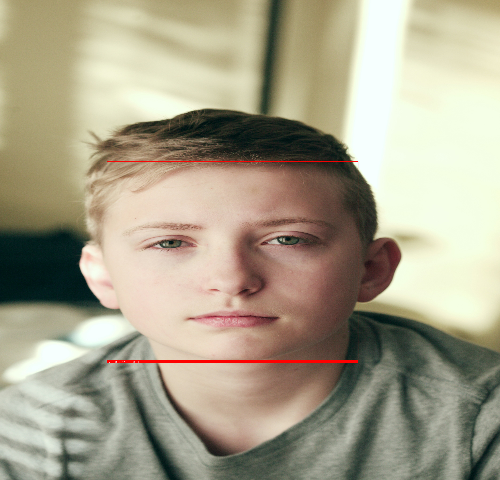

In [71]:
# Detect faces in the test image
detections = DeepFace.extract_faces(img_path=test_img, detector_backend="retinaface", enforce_detection=False)

labels = []

for det in detections:
    fa = det["facial_area"]
    x, y, w, h = fa["x"], fa["y"], fa["w"], fa["h"]

    face_crop = frame[y:y+h, x:x+w]

    embedding = DeepFace.represent(img_path=face_crop, model_name="Facenet", enforce_detection=False)[0]["embedding"]

    # Compare with known embedding
    name = "Different People"
    distances = [np.linalg.norm(np.array(embedding) - np.array(k)) for k in known_face_encodings]

    if len(distances) > 0:
        best_match_index = np.argmin(distances)
        if distances[best_match_index] < 1.0:
            name = known_face_names[best_match_index]

    labels.append(name)

    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.rectangle(frame, (x, y+h-35), (x+w, y+h), (0, 0, 255), cv2.FILLED)
    cv2.putText(frame, name, (x+6, y+h-6), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), 1)

print(labels)
frame_small = cv2.resize(frame, (500, 480))
cv2_imshow(frame_small)

clear_output(wait=True)
